# Implementation of the Kalman Filter on a physical object
We will be looking at the trajectory of a physical object through the atmosphere, like a soccer ball. First we will derive the equations of motion, then we will look at how the KF comes into play.

## 1. Model of the motion of a point
Here, we will model the motion of a point, like the center of a soccer ball.

From the equations of Newtonian motion, we have the position vector $\overline{p} = (x(t),y(t))^T$:
    
\begin{align}
    m \frac{\mathrm{d^2}}{\mathrm{dt^2}} \overline{p} + c \frac{\mathrm{d}}{\mathrm{dt}} \overline{p}
    = m \begin{bmatrix} \frac{\mathrm{d^2}}{\mathrm{dt^2}} x(t) \\ \frac{\mathrm{d^2}}{\mathrm{dt^2}} y(t) + g \end{bmatrix} 
    + c \begin{bmatrix} \frac{\mathrm{d}}{\mathrm{dt}} x(t) \\ \frac{\mathrm{d}}{\mathrm{dt}} y(t) \end{bmatrix} =0
\end{align}

Solving these equations requires the solution to a second order DE. For $x(t)$ we find:
\begin{align}
\frac{\mathrm{d^2} x(t)}{\mathrm{dt^2}} &= - \frac{c}{m} \frac{\mathrm{d} x(t)}{\mathrm{dt}}   \\ 
\int_0^t \frac{\mathrm{d^2} x(\tau)}{\mathrm{d\tau^2}} \mathrm{d\tau} &= - \frac{c}{m} \int_0^t \frac{\mathrm{d} x(\tau)}{\mathrm{d\tau}} \mathrm{d\tau} \\ 
\frac{\mathrm{d} x(t)}{\mathrm{dt}} &= A - \frac{c}{m} x(t) \\ 
\end{align}
We can find the homogenous solution:
\begin{align}
\int_{x(0)}^{x(t)} \frac{\mathrm{d} X(t)}{X(t)} &=  - \frac{c}{m}  \int_0^t \mathrm{d\tau}\\
\ln{\left(\frac{x(t)}{B}\right)} &= - \frac{c}{m}  t\\
x(t) &= B e^{\frac{-ct}{m}}
\end{align}
and the full solution becomes $x(t) = A + B e^{\frac{-ct}{m}}$ with initial condition:
\begin{align}
x(0) &= A + B \\
\frac{\mathrm{d} x(0)}{\mathrm{dt}} = v_x(0) &= A - \frac{c}{m} x(0)\\
\end{align}
so that we obtain:
\begin{align}
A = v_x(0) + \frac{c}{m} x(0) \hspace{5mm} \text{and} \hspace{5mm} B = x(0) \left(1 - \frac{c}{m} \right) - v_x(0)\\
\end{align}

For $y(t)$ we find:
\begin{align}
\frac{\mathrm{d^2} y(t)}{\mathrm{dt^2}} &= - \frac{c}{m}  \frac{\mathrm{d} y(t)}{\mathrm{dt}} - g  \\
\int_0^t \frac{\mathrm{d^2} y(\tau)}{\mathrm{d\tau^2}} \mathrm{d\tau} &= - \frac{c}{m}  \int_0^t \frac{\mathrm{d} y(\tau)}{\mathrm{d \tau}}\mathrm{d\tau} -  \int_0^t g \mathrm{d\tau} \\
\frac{\mathrm{d} y(t)}{\mathrm{dt}} &= A - \frac{c}{m} y(t) - gt \\
e^{\frac{ct}{m}} \left( \frac{\mathrm{d} y(t)}{\mathrm{dt}} + \frac{c}{m} y(t) \right) &= \frac{\mathrm{d}}{\mathrm{dt}} \left( y(t) e^{\frac{ct}{m}} \right) = e^{\frac{ct}{m}} \left( A - gt \right)\\
\int_0^t \mathrm{d} \left( y(\tau) e^{\frac{c\tau}{m}} \right) &= \int_0^t \left( A e^{\frac{c\tau}{m}} - g\tau e^{\frac{c\tau}{m}} \mathrm{d\tau} \right) \\
y(t) e^{\frac{ct}{m}} &= \frac{m A}{c} e^{\frac{c t}{m}} - \frac{mg}{c} e^{\frac{c t}{m}} t - \frac{m^2g}{c^2} e^{\frac{c t}{m}} + B \\
y(t) &= \frac{m A}{c} - \frac{mg}{c} t - \frac{m^2g}{c^2} + B e^{\frac{-ct}{m}} \\
\end{align}
with initial conditions
\begin{align}
y(0) &= \frac{m A}{c} - \frac{m^2g}{c^2} + B \\
\frac{\mathrm{d} y(0)}{\mathrm{dt}} = v_y(0) &= A - \frac{c}{m} y(0)\\
\end{align}
so that we obtain:
\begin{align}
A = v_y(0) + \frac{c}{m} y(0) \hspace{5mm} \text{and} \hspace{5mm} B = y(0) + \frac{m^2g}{c^2} - \frac{m}{c}\left( v_y(0) + \frac{c}{m} y(0) \right) =\frac{m^2g}{c^2} - \frac{m}{c}v_y(0) \\
\end{align}
As a test, take
\begin{align}
y(t)\rvert_{t=0} &= \frac{m}{c}\left( v_y(0) + \frac{c}{m} y(0) \right) - \frac{m^2g}{c^2} + \frac{m^2g}{c^2} - \frac{m}{c}v_y(0) = y(0) + \frac{m}{c}v_y(0) - \frac{m}{c}v_y(0) = y(0)
\end{align}

Let us implement this in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def trajectoryPosition(t, x0, y0, vx0, vy0, c, m, g):
    x = (vx0 + c*x0/m) + (x0*(1 - c/m) - vx0)*np.exp(-c*t/m)
    y = (m/c)*(vy0 + c*y0/m) - (m*g*t/c) - (m*m*g/c**2) + (m*m*g/c**2 - m*vy0/c)*np.exp(-c*t/m)
    return x,y

def trajectoryVelocity(t, x0, y0, vx0, vy0, c, m, g):
    vx = (-m/c)*(x0*(1 - c/m) - vx0)*np.exp(-c*t/m)
    vy =  - (m*g/c) + (-m/c)*(m*m*g/c**2 - m*vy0/c)*np.exp(-c*t/m)
    return vx,vy


Text(0.5, 1.0, 'Simple trajectory')

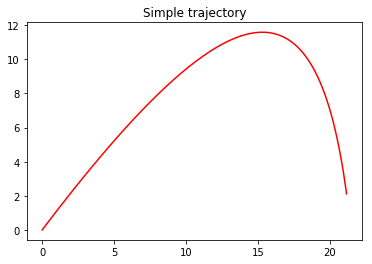

In [3]:
#Simple trajectory:
tend = 3
t = np.linspace(0,tend,100)

x0 = 0
y0 = 0
vx0 = 22.7                     # m/s
vy0 = np.sqrt(50**2 - vx0**2) # m/s -> initial speed vector with length 100 m/s

c = 0.13 # kg/s
m = 0.145 # kg
g = 9.81  # m/s^2

traject1_x, traject1_y = trajectoryPosition(t, x0, y0, vx0, vy0, c, m, g)

plt.plot(traject1_x,traject1_y, c = 'red');
plt.title('Simple trajectory')



## 2. State Space Modelling

For the Kalman Filter to work, we need a $\textbf{state space model}$, and in fact, we need two: one for $x(t)$ and one for $y(t)$, since these parameters are indepentant. The models will have to be computed on the state vectors $X_t = (x_t, v_{x,t})^T$ and $Y_t = (y_t, v_{y,t})^T$ and feature a system equation (description of the system at time t) and an observation equation (which updates the prediction variance). In our case, we can directly 'observe' the states, so the latter will only be intorduced to make the Filter work. 

The state space model for $X_t$ consists of:
\begin{align}
X_t &= A_x X_{t-1} + e_{1,x,t} \\
\chi_t &= C_x X_t + e_{2,x,t}
\end{align}

where $A_x$ transitions between states, $C^x$ transforms states into observations and in our case, $C_x$ will be an identity matrix. It is important to note that both the system and the observations have random white noise $e_{i,x,t}$, with Var$[e_{1,x,t}] = \Sigma_{1,x,t}$ and Var$[e_{2,x,t}] = \Sigma_{2,x,t}$.

Unlike the equations of motion we derived above, our state space model should be able to generalize its observations. We do not account for wind, ball spin, or a third dimension. Therefore, The initial covariance $\Sigma_{X,0}$ and the observation noise variance $\Sigma_{1,x,t}$ should be taken adequately high. With this in mind, for $X_t$ we obtain:
\begin{align}
\begin{bmatrix} x_t \\ v_{x,t} \end{bmatrix} 
&= \begin{bmatrix} x_{t-1} + v_{x,t} \Delta t \\ v_{x,t-1} - \left( \frac{c}{m} v_{x,t-1} \right) \Delta t \end{bmatrix} + e_{1,x,t} \\ 
&= \begin{bmatrix} 1 & \Delta t \\ 0 & 1 - \frac{c}{m} \Delta t \end{bmatrix} \cdot \begin{bmatrix} x_{t-1} \\ v_{x,t-1}\end{bmatrix} + e_{1,x,t}
\end{align}

Which is a time-discrete version of the equations of motion in continuous time. The state space model for $Y_t$ consists of:

\begin{align}
Y_t &= A_y Y_{t-1} + B + e_{1y,t} \\
\Upsilon_t &= C_y Y_t + e_{2,y,t}
\end{align}

where $B$ considers external inputs, like gravity. In our case, $C_y$ will also be an identity matrix. Just like we did before, we can write the equations of motion in matrix form, so that for $Y_t$ we obtain:
\begin{align}
\begin{bmatrix} y_t \\ v_{y,t} \end{bmatrix} 
&= \begin{bmatrix} y_{t-1} + v_{y,t} \Delta t \\ v_{y,t-1} - \left( \frac{c}{m} v_{y,t-1} + g \right) \Delta t \end{bmatrix} + e_{1,y,t}\\
&= \begin{bmatrix} 1 & \Delta t \\ 0 & 1 - \frac{c}{m} \Delta t \end{bmatrix} \cdot \begin{bmatrix} y_{t-1} \\ v_{y,t-1}\end{bmatrix} + \begin{bmatrix} 0 \\ -g \Delta t \end{bmatrix} + e_{1,y,t}
\end{align}


## 3. Writing the Kalman Filter in code

The Kalman Filter consists of filtering an observation with the covariance of observation noise, system noise, and uncertainty concerning its location. We will run through some of the calculations for $X_t$.

When an observation comes in, it is run through the state space model to make a filtered prediction (reconstruction). Its variance is adjusted accordingly:

\begin{align}
X_{t+1} &= A_x X_{t} \\
Var[X_{t+1}] &= A_x Var[X_{t}] A_x^T + \Sigma_1
\end{align}

which comes from the fact that we estimate prediction errors to be normally distributed. The corresponding observation variance becomes:

\begin{align}
Var[\chi_{t+1}] &= C_x Var[X_{t}] C_x^T + \Sigma_2
\end{align}

We can then finally update the reconstruction and its variance through:

\begin{align}
\hat{X}_{t+1} &= X_{t+1} + K_t \left( \chi_t - C_x Var[X_{t}] \right) \\
Var[\hat{X}_{t+1}] &= Var[X_{t+1}] - K_t C_x Var[X_{t+1}]
\end{align}

where $K_t$ is the Kalman Gain, a link between the covariance of $X_t$ and $\chi_t$.


In [4]:
# Write a function that performs the Kalman Filter on one observation at a certain time t:
def KF(obs, A, B, Var_X, Sigma1, Sigma2, prevPred):
    # obs = observation at time t-1
    # A   = state transistion matrix
    # Var_X    = covariance of state prediction
    # Var_chi  = covariance of state observation
    # Sigma1   = covariance of system noise
    # Sigma2   = covariance of observation noise
    
    # Make a prediction according to the model, if observation is missing use previous prediction:
    if (np.isnan(obs[0]) == True) or (np.isnan(obs[1]) == True):
        obs = prevPred
    pred = A@obs + B
        
    Var_X_new = (A@(Var_X@A.T)) + Sigma1
    
    # Since C is always an identity matrix, we can leave out C and increase performance.
    Var_chi =  Var_X_new + Sigma2 
    KalmanGain = Var_X_new@np.linalg.inv(Var_chi) #Var_X@np.linalg.inv(Var_chi)
    
    # Update prediction and variance
    pred += KalmanGain@( obs - pred ) #KalmanGain@( obs - pred )
    Var_X_new -=  KalmanGain@Var_X_new #KalmanGain@Var_X_new
    return pred, Var_X_new

# As a simple test:
Var_X  = (0.02**2)*np.eye(2)
Sigma1 = (0.01**2)*np.eye(2) 
Sigma2 = (0.02**2)*np.eye(2) 

X0 = np.array([x0, vx0])
X_KFx = KF(X0, np.array([[1, 0.01],[0, 1-c*0.01/m]]), 0, Var_X, Sigma1, Sigma2, 0)[0]
print(X0, X_KFx)

[ 0.  22.7] [ 0.10128796 22.60837484]


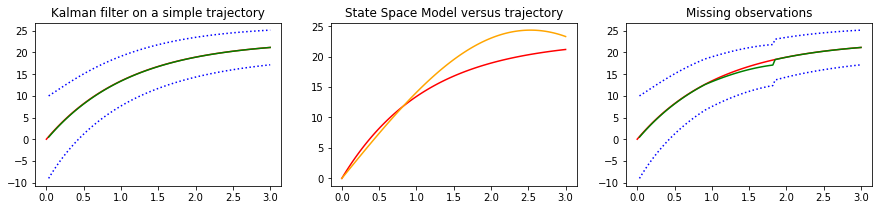

In [5]:
# Number of observations from the analytical model: 
#print('t has length',t.shape[0]) 
tmax = t.shape[0]
dt = 2/tmax

# Reload the trajectory data
traject1_x, traject1_y = trajectoryPosition(t, x0, y0, vx0, vy0, c, m, g)
traject1_vx, traject1_vy = trajectoryVelocity(t, x0, y0, vx0, vy0, c, m, g)
chi1 = np.vstack((traject1_x, traject1_vx)).T

# Make the orbit of x_t using the state space model and update with the Kalman Filter:
X0 = np.zeros((tmax,2))
X0[0] = np.array([x0, vx0])

Var_X = np.zeros((2,2,tmax))
Var_X[:,:,0] = (5**2)*np.eye(2) 
Sigma1x = (0.1**2)*np.eye(2) 
Sigma2x = (20**2)*np.eye(2) 

Ax = np.array([[1, dt],[-c*dt/m, 1]])

# Save Filtered States. First Filtered State relies on first observation, so use np.nan
X_KFx = np.zeros((tmax,2))
X_KFx[0,:] = np.nan

for tau in range(tmax-1):
    X0[tau+1] = Ax@X0[tau]
    X_KFx[tau+1], Var_X[:,:,tau+1] = KF(chi1[tau,:], Ax, 0, Var_X[:,:,tau], Sigma1x, Sigma2x, X_KFx[tau])

f,ax = plt.subplots(figsize=(15,3), ncols = 3)
ax[0].plot(t, traject1_x, c = 'red');
ax[0].plot(t, X_KFx[:,0], c = 'green');
ax[0].plot(t, X_KFx[:,0] + 1.96*np.sqrt(Var_X[0,0,:]), c = 'blue', linestyle = ':');
ax[0].plot(t, X_KFx[:,0] - 1.96*np.sqrt(Var_X[0,0,:]), c = 'blue', linestyle = ':');
ax[0].set_title('Kalman filter on a simple trajectory')

ax[1].plot(t, traject1_x, c = 'red');
ax[1].plot(t, X0[:,0], c = 'orange');
ax[1].set_title('State Space Model versus trajectory');

# Make 'missing observations':
chi1_misObs = chi1
chi1_misObs[30:60,:] = float('nan')
for tau in range(tmax-1):
    X_KFx[tau+1], Var_X[:,:,tau+1] = KF(chi1_misObs[tau,:], Ax, 0, Var_X[:,:,tau], Sigma1x, Sigma2x, X_KFx[tau])


ax[2].plot(t, traject1_x, c = 'red');
ax[2].plot(t, X_KFx[:,0], c = 'green');
ax[2].plot(t, X_KFx[:,0] + 1.96*np.sqrt(Var_X[0,0,:]), c = 'blue', linestyle = ':');
ax[2].plot(t, X_KFx[:,0] - 1.96*np.sqrt(Var_X[0,0,:]), c = 'blue', linestyle = ':');
ax[2].set_title('Missing observations');




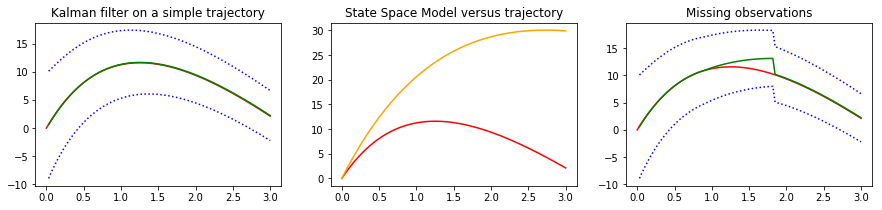

In [6]:
# Perform the same calculations for y:
chi1 = np.vstack((traject1_y, traject1_vy)).T

Y0 = np.zeros((tmax,2))
Y0[0] = np.array([y0, vy0])

Var_Y = np.zeros((2,2,tmax))
Var_Y[:,:,0] = (5**2)*np.eye(2) 

Ay = np.array([[1, dt],[0, 1-c*dt/m]])
B = np.array([0, -g*dt])
Sigma1y = (0.1**2)*np.eye(2) 
Sigma2y = (20**2)*np.eye(2) 

# Save Filtered States. First Filtered State relies on first observation, so use np.nan
Y_KFy = np.zeros((tmax,2))
Y_KFy[0,:] = np.nan

for tau in range(tmax-1):
    Y0[tau+1] = Ay@Y0[tau] + B
    Y_KFy[tau+1], Var_Y[:,:,tau+1] = KF(chi1[tau,:], Ay, B, Var_Y[:,:,tau], Sigma1y, Sigma2y, Y_KFy[tau])

f,ax = plt.subplots(figsize=(15,3), ncols = 3)
ax[0].plot(t, traject1_y, c = 'red');
ax[0].plot(t, Y_KFy[:,0], c = 'green');
ax[0].plot(t, Y_KFy[:,0] + 1.96*np.sqrt(Var_Y[0,0,:]), c = 'blue', linestyle = ':');
ax[0].plot(t, Y_KFy[:,0] - 1.96*np.sqrt(Var_Y[0,0,:]), c = 'blue', linestyle = ':');
ax[0].set_title('Kalman filter on a simple trajectory')

ax[1].plot(t, traject1_y, c = 'red');
ax[1].plot(t, Y0[:,0], c = 'orange');
ax[1].set_title('State Space Model versus trajectory');

chi1_misObs = chi1
chi1_misObs[30:60,:] = float('nan')
for tau in range(tmax-1):
    Y_KFy[tau+1], Var_Y[:,:,tau+1] = KF(chi1_misObs[tau,:], Ay, B, Var_Y[:,:,tau], Sigma1y, Sigma2y, Y_KFy[tau])

ax[2].plot(t, traject1_y, c = 'red');
ax[2].plot(t, Y_KFy[:,0], c = 'green');
ax[2].plot(t, Y_KFy[:,0] + 1.96*np.sqrt(Var_Y[0,0,:]), c = 'blue', linestyle = ':');
ax[2].plot(t, Y_KFy[:,0] - 1.96*np.sqrt(Var_Y[0,0,:]), c = 'blue', linestyle = ':');
ax[2].set_title('Missing observations');

(100,)


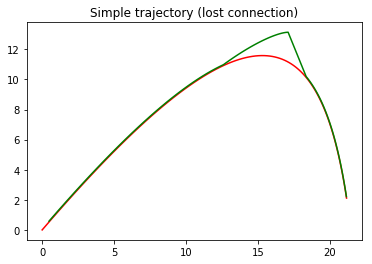

In [7]:
# Plotting everything together:
plt.plot(traject1_x,traject1_y, c = 'red');
plt.plot(X_KFx[:,0], Y_KFy[:,0], c = 'green')
plt.title('Simple trajectory (lost connection)');

print(traject1_x.shape)